# Dataset

In [1]:
# mnist handwritten digits

# Import the Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical

In [3]:
# Load the Dataset

In [4]:
(x_train, y_train),(x_test,y_test) =mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

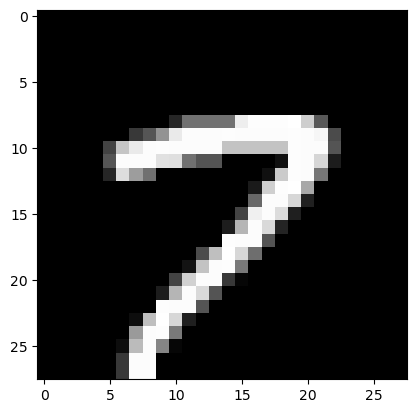

In [7]:
plt.imshow(x_train[123],cmap = 'gray')

In [8]:
y_train[123]

7

In [9]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [10]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [11]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

# Build the Model

In [12]:
model = Sequential()

#Convolutional pooling pair-1
model.add(Conv2D(kernel_size=(3,3), filters = 16, activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

#Convolutional - Pooling Pair-2
model.add(Conv2D(kernel_size=(3,3), filters = 32, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten the Data
model.add(Flatten())

#Deep Neural Network
model.add(Dense(512, activation = 'relu'))

#Output Layer
model.add(Dense(10, activation = 'softmax'))

# Compile the model

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# Train the Model

In [14]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [15]:
model.fit(x_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10


6000/6000 [==============================] - 34s 5ms/step - loss: 0.2348 - accuracy: 0.9538
Epoch 2/10
6000/6000 [==============================] - 36s 6ms/step - loss: 0.0802 - accuracy: 0.9774
Epoch 3/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0616 - accuracy: 0.9834
Epoch 4/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0507 - accuracy: 0.9865
Epoch 5/10
6000/6000 [==============================] - 29s 5ms/step - loss: 0.0489 - accuracy: 0.9877
Epoch 6/10
6000/6000 [==============================] - 30s 5ms/step - loss: 0.0473 - accuracy: 0.9886
Epoch 7/10
6000/6000 [==============================] - 38s 6ms/step - loss: 0.0472 - accuracy: 0.9894
Epoch 8/10
6000/6000 [==============================] - 33s 6ms/step - loss: 0.0460 - accuracy: 0.9901
Epoch 9/10
6000/6000 [==============================] - 35s 6ms/step - loss: 0.0431 - accuracy: 0.9913
Epoch 10/10
6000/6000 [==============================] - 32s 5ms/step -

# Evaluate on the Test Dataset

In [16]:
model.evaluate(x_test, y_test, batch_size = 1)

10000/10000 [==============================] - 14s 1ms/step - loss: 0.1404 - accuracy: 0.9838


[0.14044085144996643, 0.9837999939918518]

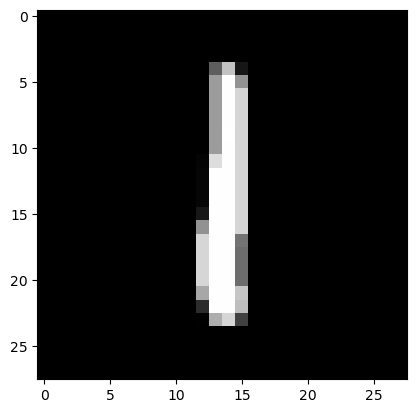

In [17]:
new = x_test[3546]
plt.imshow(new, cmap = 'gray')

In [18]:
new.shape

(28, 28)

In [19]:
new = new.reshape(1,28,28)

In [20]:
model.predict(new)

1/1 [==============================] - 0s 88ms/step


array([[6.2105099e-33, 1.0000000e+00, 1.6504637e-31, 2.1220136e-37,
        1.7532441e-27, 1.6150164e-27, 5.1255575e-30, 3.4579563e-21,
        3.1955726e-30, 3.5930480e-35]], dtype=float32)

In [21]:
np.argmax(model.predict(new))

1/1 [==============================] - 0s 21ms/step


1

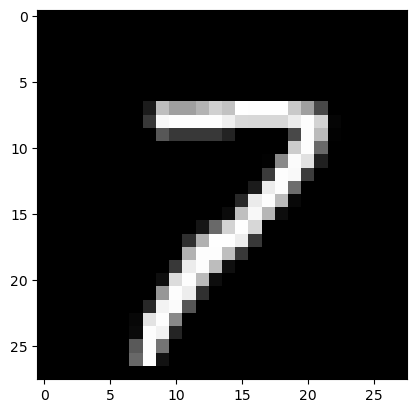

In [22]:
new = x_test[5205]
plt.imshow(new, cmap = 'gray')

In [23]:
new.shape

(28, 28)

In [24]:
new = new.reshape(28,28)

In [ ]:
model.predict(new)

In [ ]:
np.argmax(model.predict(new))